In [66]:
from HeaderP import *

In [2]:
import Astraea

In [3]:
KOIdata_ep=pd.read_table('KOI.csv',delimiter=',',skiprows=53)
KOIdata_ep.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [4]:
KOI_periods=pd.read_pickle('Periods.pkl')
KOI_periods=KOI_periods.loc[~(KOI_periods==0).all(axis=1)]
KOI_periods=KOI_periods.loc[:, (KOI_periods != 0).any(axis=0)]
KOI_periods['KIC']= [int(i[4:]) for i in KOI_periods.KIC]

LG_labels=['Prot_lg'+str(i) for i in range(14)]
LG_labels_peak=['peak_lg'+str(i) for i in range(14)]

ACF_labels=['Prot_acf'+str(i) for i in range(14)]
ACF_labels_peak=['peak_acf'+str(i) for i in range(14)]

np.ma.median(KOI_periods[LG_labels])

KOI_periods['LG_period']=[np.median(KOI_periods.iloc[i][LG_labels][KOI_periods.iloc[i][LG_labels]!=0]) for i in range(len(KOI_periods))]
KOI_periods['LG_peak']=[np.median(KOI_periods.iloc[i][LG_labels_peak][KOI_periods.iloc[i][LG_labels_peak]!=0]) for i in range(len(KOI_periods))]

KOI_periods['ACF_period']=[np.median(KOI_periods.iloc[i][ACF_labels][KOI_periods.iloc[i][ACF_labels]!=0]) for i in range(len(KOI_periods))]
KOI_periods['ACF_peak']=[np.median(KOI_periods.iloc[i][ACF_labels_peak][KOI_periods.iloc[i][ACF_labels_peak]!=0]) for i in range(len(KOI_periods))]

In [5]:
KOI_periods=KOI_periods[['KIC','LG_period','LG_peak','ACF_period','ACF_peak']]

In [6]:
KOI_period_maz=pd.read_table('mazeh.csv',delimiter=';',skiprows=73)
KOI_period=pd.merge(KOI_period_maz,KOI_periods,left_on='KIC',right_on='KIC',how='inner')
KOI_period

,KOI,KIC,Teff,log(g),Prot,e_Prot,Rvar,LPH,w,D,...,R,M1,M2,Simbad,_RA,_DE,LG_period,LG_peak,ACF_period,ACF_peak
0,1,11446443,5713,4.143,70.55,16.47,445.0,0.362359,0.000000,0,...,0,1,0,Simbad,286.80847,49.31640,19.773981,0.004016,1.083333,0.100390
1,2,10666592,6264,3.790,70.69,6.80,919.0,0.542156,0.000000,0,...,0,1,0,Simbad,292.24728,47.96952,2.204612,0.109906,2.208333,0.104030
2,3,10748390,4766,4.590,29.31,0.49,12246.0,0.607229,0.431926,0,...,0,0,0,Simbad,297.70935,48.08085,30.105467,0.505145,28.760417,0.351926
3,10,6922244,6213,4.170,82.12,16.05,1245.0,0.350827,0.000000,0,...,0,1,0,Simbad,281.28812,42.45108,3.521421,0.044790,7.041667,0.067496
4,12,5812701,6419,4.262,1.23,0.14,803.0,0.285161,0.206861,0,...,0,0,1,Simbad,297.45374,41.01099,1.323006,0.074460,1.375000,0.254117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,5875,11176166,6246,4.355,0.71,0.08,1055.0,0.026151,0.000000,0,...,0,1,0,Simbad,283.06863,48.80208,17.596845,0.020851,1.041667,0.101913
1559,6145,6221385,6251,4.138,13.46,0.49,1899.0,0.588806,0.000000,0,...,0,1,0,Simbad,296.35944,41.57453,15.411396,0.200419,13.312500,0.325398
1560,6186,8653134,5094,4.634,5.10,0.00,55755.0,1.578493,0.787393,0,...,0,0,0,Simbad,300.43100,44.75101,5.102453,0.495459,5.104167,0.884017
1561,6228,10717220,5489,4.539,1.44,0.00,6379.0,1.667483,0.811170,0,...,0,0,0,Simbad,285.47504,48.03493,1.445834,0.216834,1.458333,0.431009


In [7]:
with fits.open('../FirstYearML/kepler_dr2_1arcsec.fits') as data_ga:
    gaia = pd.DataFrame(data_ga[1].data, dtype="float64")
gaia['v_tan'],gaia['v_b']=Astraea.getVs(gaia)
KOIdata_2=pd.merge(KOIdata_ep,KOI_period,left_on='kepid',right_on='KIC',how='inner')
print('before merging with gaia:',np.shape(KOIdata_2))
KOIdata=pd.merge(KOIdata_2,gaia,left_on='kepid',right_on='kepid',how='inner')
print('after merging with gaia:',np.shape(KOIdata))
KOIdata.drop_duplicates(subset ="kepoi_name", keep = "first", inplace = True) 
print('dropping duplicates from gaia:',np.shape(KOIdata))

/Users/lucy/anaconda3/lib/python3.7/site-packages/astropy/units/equivalencies.py:90: RuntimeWarning: invalid value encountered in less
  d[d < 0] = np.nan
/Users/lucy/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/lucy/anaconda3/lib/python3.7/site-packages/astropy/coordinates/distances.py:183: RuntimeWarning: invalid value encountered in less
  if not allow_negative and np.any(distance.value < 0):
/Users/lucy/anaconda3/lib/python3.7/site-packages/astropy/coordinates/angles.py:642: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/lucy/anaconda3/lib/python3.7/site-packages/astropy/coordinates/angles.py:529: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/lucy/anaconda3/lib/pytho

before merging with gaia: (2496, 74)
after merging with gaia: (2519, 209)
dropping duplicates from gaia: (2492, 209)


In [8]:
# get confirmed data
KOIdata_c=KOIdata.loc[KOIdata['koi_disposition']=='CONFIRMED']

In [9]:
# see if we can get Prot for all of them
from sklearn.externals import joblib
regM_c=joblib.load('/Users/lucy/Desktop/FirstYearML/Astraea/data/RF_Class_model.sav')
regM=joblib.load('RF_Regre_model.sav')

Features_c=['LG_peak', 'Rvar', 'parallax', 'radius_percentile_lower', 'radius_percentile_upper', 'phot_g_mean_flux_over_error', 'bp_g']
Features=['b','bp_g','lum_val','phot_g_mean_flux_over_error','radius_val','teff','v_b','v_tan','Rvar']

KOIdata_c=KOIdata_c.dropna(subset=np.append(Features,Features_c))
KOIdata_c=KOIdata_c.loc[:,~KOIdata_c.columns.duplicated()]

probs = regM_c.predict_proba(KOIdata_c[Features_c])
preds = probs[:,1]
for i in range(len(preds)):
    if preds[i]<=0.4:
        preds[i]=0
    else:
        preds[i]=1
print(str(sum(preds))+' stars have predictable rotation periods ('+ str(float(sum(preds))/float(len(KOIdata_c))*100)+'%)')
    
KOIdata_c['Prot_class']=preds


KOIdata_c=KOIdata_c.loc[KOIdata_c['Prot_class']!=0]


2014.0 stars have predictable rotation periods (99.65363681345868%)


In [10]:
# Period threshold
P_thred=5
# Radius threshold
rad_thred=7

In [11]:
# with hot jupiter 
KOI_HJ=KOIdata_c.loc[(KOIdata_c['koi_period']<P_thred)].loc[(KOIdata_c['koi_prad']>rad_thred)].reset_index()
KOI_HJ

,index,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,v_tan,v_b,Prot_class
0,9,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,...,1.0,1.0,10.232,9.920,9.846,conf,0.073983,5.611935,-4.398069,1.0
1,10,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,...,1.0,7.0,9.555,9.344,9.334,conf,0.089069,33.208133,33.204996,1.0
2,11,6922244,K00010.01,Kepler-8 b,CONFIRMED,CANDIDATE,0.998,0,0,0,...,1.0,1.0,12.576,12.324,12.293,conf,0.003994,22.085562,-3.827542,1.0
3,36,11414511,K00767.01,Kepler-670 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,13.732,13.393,13.315,conf,0.101322,20.828484,1.668971,1.0
4,70,4275191,K00813.01,Kepler-688 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,14.364,13.969,13.924,conf,0.060220,10.224352,-9.909307,1.0
5,72,3351888,K00801.01,Kepler-685 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,13.656,13.355,13.307,conf,0.031220,30.381580,-13.006429,1.0
6,78,3935914,K00809.01,Kepler-686 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,14.350,13.941,13.917,conf,0.121876,31.249482,11.497167,1.0
7,87,5358624,K00830.01,Kepler-428 b,CONFIRMED,CANDIDATE,0.990,0,0,0,...,1.0,1.0,13.767,13.295,13.234,conf,0.077628,52.813047,-26.746358,1.0
8,185,7849854,K00897.01,Kepler-718 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,14.005,13.679,13.604,conf,0.009856,68.078357,-7.331019,1.0
9,204,8255887,K00908.01,Kepler-720 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,13.785,13.390,13.243,conf,0.021464,9.515293,5.603973,1.0


In [12]:
# w/o hot jupiter
KOI_noHJ=KOIdata_c.loc[~KOIdata_c['kepid'].isin(KOI_HJ.kepid)].reset_index()
KOI_noHJ

,index,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,v_tan,v_b,Prot_class
0,0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2.0,2.0,14.082,13.751,13.648,conf,0.080835,26.486786,1.473957,1.0
1,1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,2.0,2.0,14.082,13.751,13.648,conf,0.080835,26.486786,1.473957,1.0
2,2,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,1.0,14.366,14.064,13.952,conf,0.049009,20.239674,-0.896489,1.0
3,3,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,3.0,3.0,14.528,14.113,14.132,conf,0.030762,77.130032,6.080044,1.0
4,4,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,3.0,3.0,14.528,14.113,14.132,conf,0.030762,77.130032,6.080044,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2511,11176166,K05875.01,Kepler-1639 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2.0,2.0,13.508,13.190,13.211,conf,0.065487,39.184323,14.443828,1.0
1973,2513,8653134,K06186.01,Kepler-1643 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,4.0,12.284,11.764,11.636,conf,0.041795,5.648718,-3.175570,1.0
1974,2515,10989274,K06233.01,Kepler-1645 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.0,2.0,13.286,12.949,12.897,conf,0.057787,30.587673,-24.718506,1.0
1975,2516,6221385,K06145.01,Kepler-1641 b,CONFIRMED,CANDIDATE,0.937,0,0,0,...,3.0,3.0,13.161,12.862,12.735,conf,0.015263,13.044374,-12.786522,1.0


In [13]:
len(KOIdata_c)-len(KOI_noHJ)-len(KOI_HJ) # make sure adds up to almost 0...
print(len(KOIdata_c))
print(len(KOI_noHJ))
print(len(KOI_HJ))

2014
1977
35


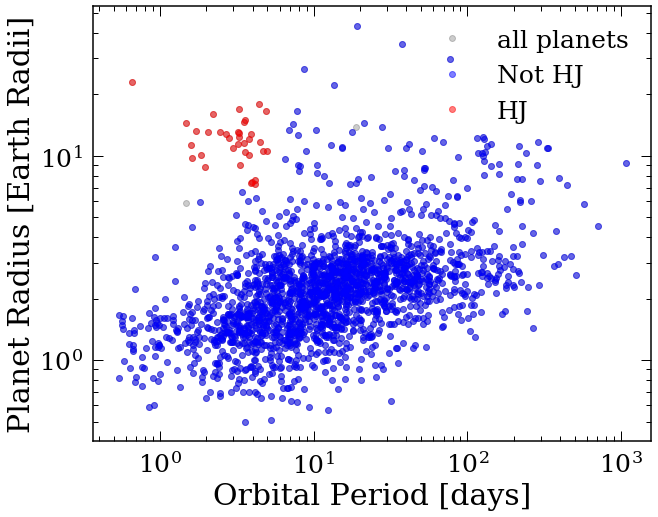

In [14]:
# plot radius vs orbital periods
plt.figure(figsize=(10,8))
plt.loglog(KOIdata_c['koi_period'],KOIdata_c['koi_prad'],'ko',alpha=0.2,label='all planets')
plt.loglog(KOI_noHJ['koi_period'],KOI_noHJ['koi_prad'],'bo',alpha=0.5,label='Not HJ')
plt.loglog(KOI_HJ['koi_period'],KOI_HJ['koi_prad'],'ro',alpha=0.5,label='HJ')
plt.xlabel('Orbital Period [days]')
plt.ylabel('Planet Radius [Earth Radii]')
plt.legend()

In [212]:
testF=['teff', 'bp_g', 'lum_val', 'v_tan', 'phot_g_mean_flux_over_error', 'v_b', 'radius_val', 'b','Rvar']
regr,importance,actrualF,ID_train,ID_test,predictp,ave_chi,MRE_val,X_test,y_test,X_train,y_train=Astraea.RFregressor(KOI_noHJ,testF,ID_on='kepoi_name',target_var_err='e_Prot',n_estimators=1)

Simpliest example:
 regr,importance,actrualF,ID_train,ID_test,predictp,ave_chi,MRE_val,X_test,y_test,X_train,y_train = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 9
Features attempt to train: ['teff', 'bp_g', 'lum_val', 'v_tan', 'phot_g_mean_flux_over_error', 'v_b', 'radius_val', 'b', 'Rvar']
2158 stars in dataframe!
Missing 173 stars from null values in data!

1985 total stars used for RF!
1588 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.18232311035981658
Average chi^2 is: 1442.9336009335889
Finished!


/Users/lucy/anaconda3/lib/python3.7/site-packages/Astraea-0.1.0-py3.7.egg/Astraea/Astraea.py:91: RuntimeWarning: invalid value encountered in double_scalars
  meree=np.median([abs(TrueVal[i]-PreVal[i])/TrueVal[i] for i in range(len(TrueVal))])
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Median relative error is:  nan


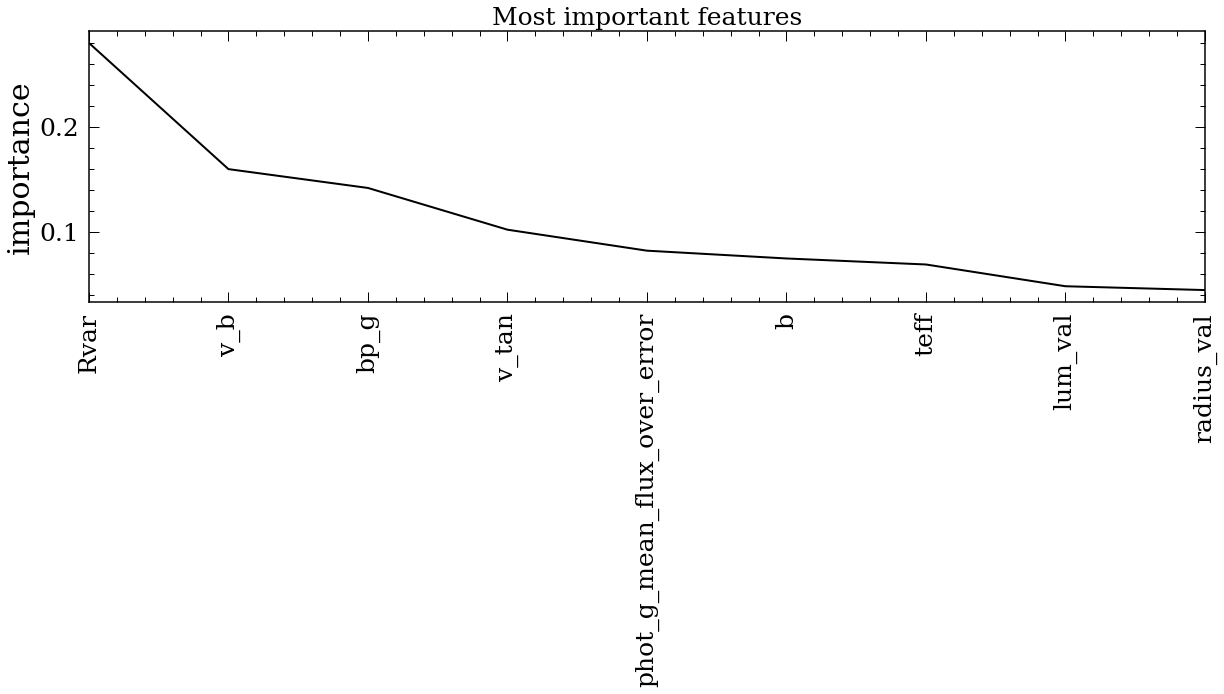

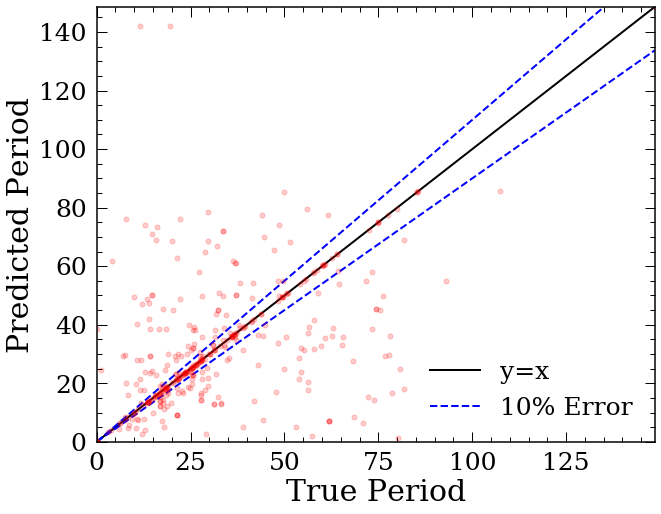

In [213]:
Astraea.plot_result(actrualF,importance,predictp,y_test,MS=10)

Text(0, 0.5, 'Predicted Prot')

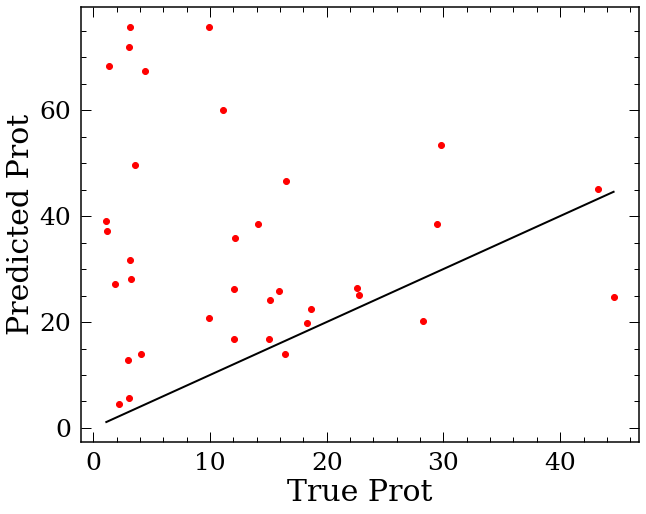

In [214]:
# predict HJ rotation periods
Xy_HJ=KOI_HJ[np.append(actrualF,['periods'])].dropna()
X_HJ=Xy_HJ[actrualF]
# true values
y_HJ=Xy_HJ['periods']
y_HJ_test=regr.predict(X_HJ)
plt.figure(figsize=(10,8))
plt.plot(y_HJ,y_HJ_test,'ro')
plt.plot(sorted(y_HJ),sorted(y_HJ),'k-')
plt.xlabel('True Prot')
plt.ylabel('Predicted Prot')

# try to use trained kepler model

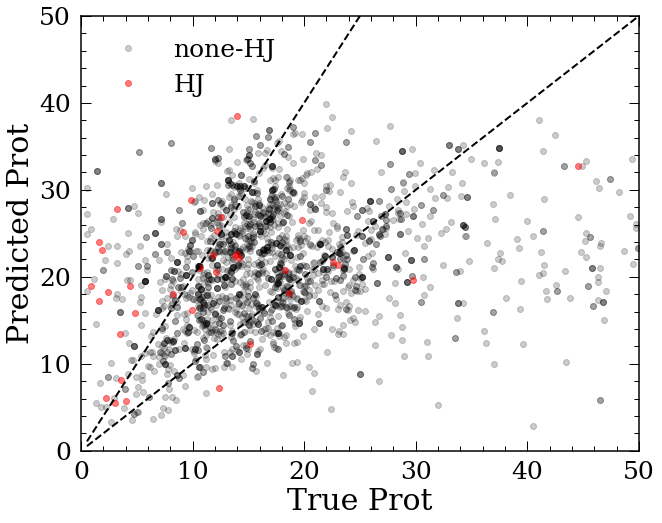

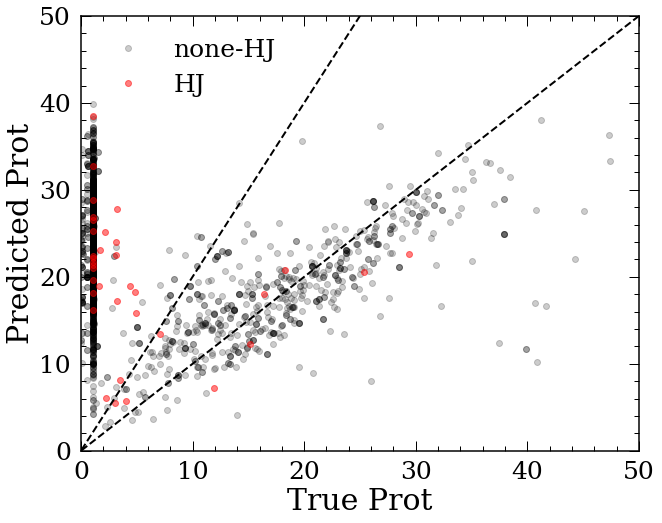

In [32]:
# predict HJ rotation periods
Xy_HJ=KOI_HJ[np.append(Features,['LG_period'])].dropna()
X_HJ=Xy_HJ[Features]
# true values
y_HJ=Xy_HJ['LG_period']
y_HJ_test=regM.predict(X_HJ)

# predict others rotation periods
Xy_noHJ=KOI_noHJ[np.append(Features,['LG_period'])].dropna()
X_noHJ=Xy_noHJ[Features]
# true values
y_noHJ=Xy_noHJ['LG_period']
y_noHJ_test=regM.predict(X_noHJ)

plt.figure(figsize=(10,8))
plt.plot(y_noHJ,y_noHJ_test,'ko',alpha=0.2,label='none-HJ')
plt.plot(y_HJ,y_HJ_test,'ro',alpha=0.5,label='HJ')
plt.plot(sorted(y_noHJ),sorted(y_noHJ),'k--')
plt.plot(sorted(y_noHJ),sorted(2*y_noHJ),'k--')
plt.ylim([0,50])
plt.xlim([0,50])
plt.xlabel('True Prot')
plt.ylabel('Predicted Prot')
plt.legend()

plt.savefig('Prot_LG.png')


# predict HJ rotation periods
Xy_HJ=KOI_HJ[np.append(Features,['ACF_period','koi_period','LG_period'])].dropna()
X_HJ=Xy_HJ[Features]
# true values
y_HJ=Xy_HJ['ACF_period']
y_HJ_test=regM.predict(X_HJ)

# predict others rotation periods
Xy_noHJ=KOI_noHJ[np.append(Features,['ACF_period','koi_period','LG_period'])].dropna()
X_noHJ=Xy_noHJ[Features]
# true values
y_noHJ=Xy_noHJ['ACF_period']
y_noHJ_test=regM.predict(X_noHJ)

plt.figure(figsize=(10,8))
plt.plot(y_noHJ,y_noHJ_test,'ko',alpha=0.2,label='none-HJ')
plt.plot(y_HJ,y_HJ_test,'ro',alpha=0.5,label='HJ')
plt.plot(sorted(y_noHJ),sorted(y_noHJ),'k--')
plt.plot(sorted(y_noHJ),sorted(2*y_noHJ),'k--')
plt.ylim([0,50])
plt.xlim([0,50])
plt.xlabel('True Prot')
plt.ylabel('Predicted Prot')
plt.legend()

plt.savefig('Prot_ACF.png')

In [ ]:
for i in Features:
    plt.figure(figsize=(10,8))
    plt.semilogy(KOI_HJ['periods'],KOI_HJ[i],'ro',label='HJ')
    plt.semilogy(KOI_noHJ['periods'],KOI_noHJ[i],'ko',alpha=0.2,label='non-HJ')
    plt.ylabel(i)
    plt.xlabel('Period [days]')
    plt.xlim([0,60])

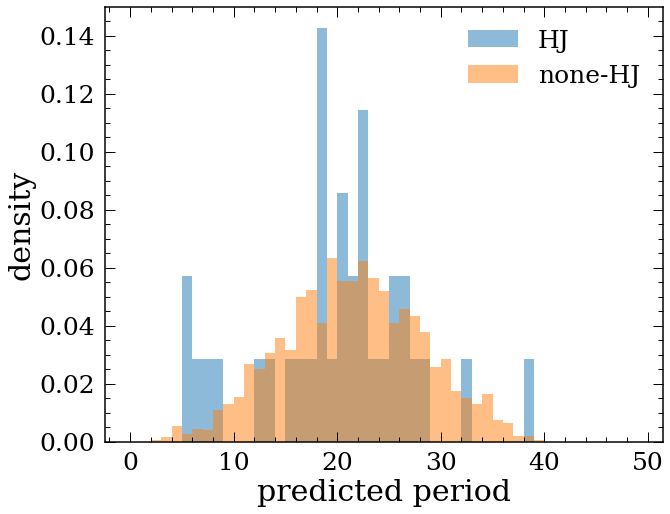

In [225]:
plt.figure(figsize=(10,8))
bins=range(50)
plt.hist(y_HJ_test,bins=bins,density=True,alpha=0.5,label='HJ')
plt.hist(y_noHJ_test,bins=bins,density=True,alpha=0.5,label='none-HJ')
plt.xlabel('predicted period')
plt.ylabel('density')
plt.legend()

# Period (log) vs orbital period 

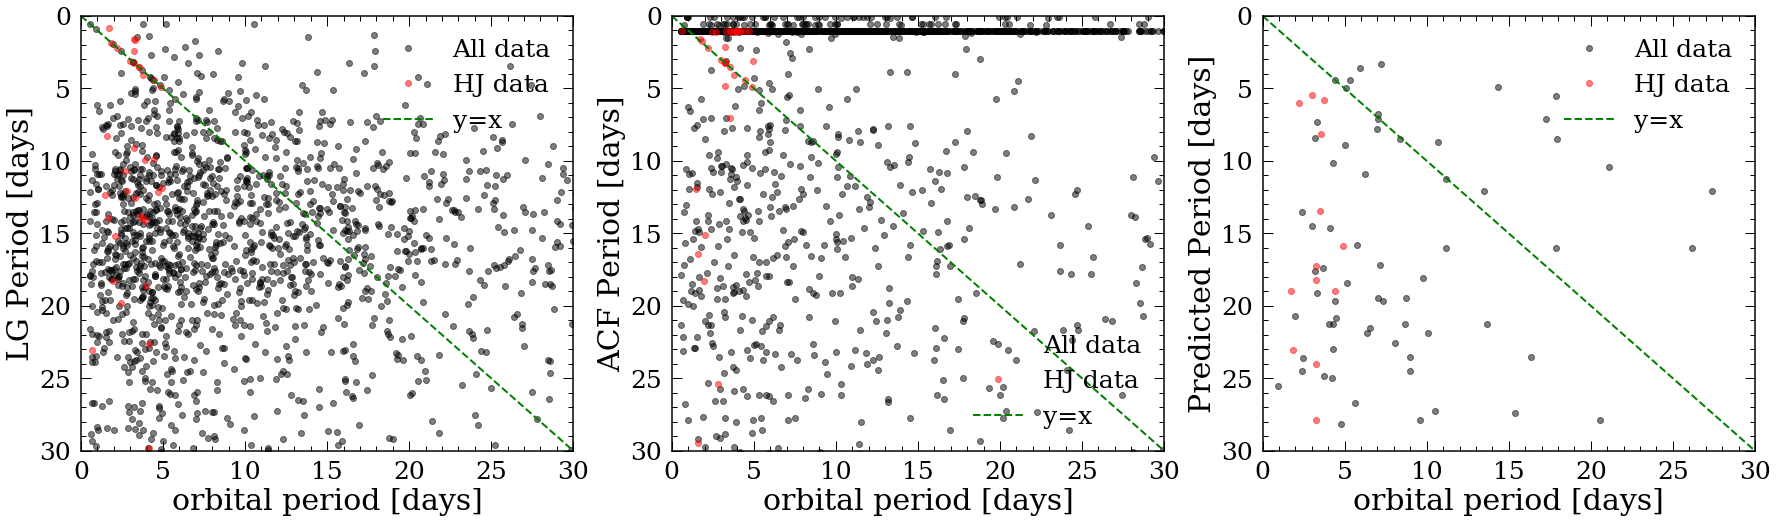

In [35]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)

plt.plot(Xy_noHJ['koi_period'],Xy_noHJ['LG_period'],'ko',label='All data',alpha=0.5)
plt.plot(KOI_HJ['koi_period'],KOI_HJ['LG_period'],'ro',label='HJ data',alpha=0.5)


plt.plot([0,30],[0,30],'g--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.gca().invert_yaxis()
plt.ylabel('LG Period [days]')
plt.xlabel('orbital period [days]')
plt.legend()

plt.subplot(1,3,2)

plt.plot(Xy_noHJ['koi_period'],Xy_noHJ['ACF_period'],'ko',label='All data',alpha=0.5)
plt.plot(KOI_HJ['koi_period'],KOI_HJ['ACF_period'],'ro',label='HJ data',alpha=0.5)

mask=Xy_noHJ['LG_period']<6
mask_HJ=KOI_HJ['LG_period']<6

plt.plot([0,30],[0,30],'g--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.gca().invert_yaxis()
plt.ylabel('ACF Period [days]')
plt.xlabel('orbital period [days]')
plt.legend()


plt.subplot(1,3,3)
plt.plot(Xy_noHJ['koi_period'].loc[mask],y_noHJ_test[mask],'ko',label='All data',alpha=0.5)
plt.plot(KOI_HJ['koi_period'].loc[mask_HJ],y_HJ_test[mask_HJ],'ro',label='HJ data',alpha=0.5)


plt.plot([0,30],[0,30],'g--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.gca().invert_yaxis()
plt.ylabel('Predicted Period [days]')
plt.xlabel('orbital period [days]')
plt.legend()
#plt.savefig('PeriodsvsOP.png')

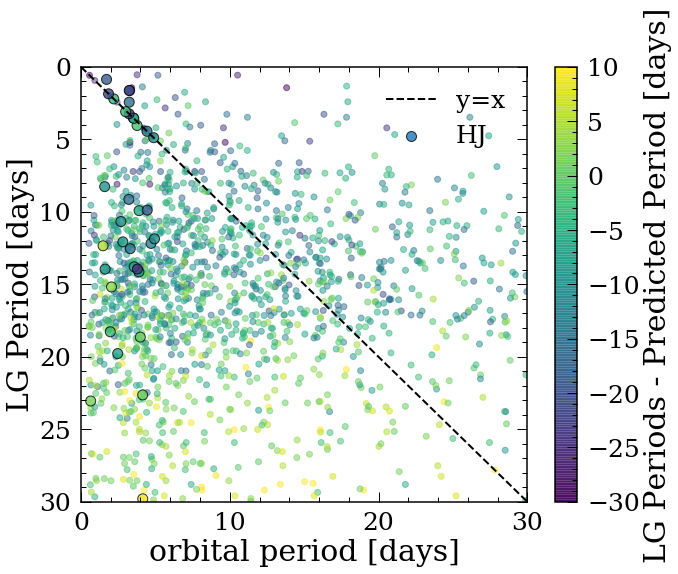

In [65]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis')
plt.scatter(Xy_noHJ['koi_period'],Xy_noHJ['LG_period'],c=Xy_noHJ['LG_period']-y_noHJ_test,vmin=-30,vmax=10,cmap=cm,edgecolors=None,alpha=0.5)
plt.scatter(KOI_HJ['koi_period'],KOI_HJ['LG_period'],c=KOI_HJ['LG_period']-y_HJ_test,vmin=-30,vmax=10,cmap=cm,edgecolors='k',s=100,alpha=0.8,label='HJ')
cb=plt.colorbar()
cb.set_label('LG Periods - Predicted Period [days]')
plt.plot([0,30],[0,30],'k--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.gca().invert_yaxis()
plt.ylabel('LG Period [days]')
plt.xlabel('orbital period [days]')
plt.legend()

Text(0.5, 0, 'orbital period [days]')

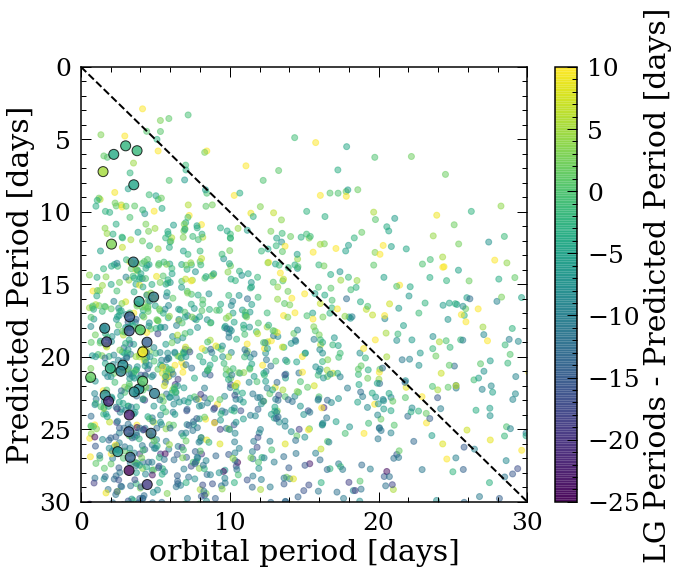

In [59]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis')
plt.scatter(Xy_noHJ['koi_period'],y_noHJ_test,c=Xy_noHJ['LG_period']-y_noHJ_test,vmin=-25,vmax=10,cmap=cm,edgecolors=None,alpha=0.5)
plt.scatter(KOI_HJ['koi_period'],y_HJ_test,c=KOI_HJ['LG_period']-y_HJ_test,vmin=-25,vmax=10,cmap=cm,edgecolors='k',s=100,alpha=0.8)
cb=plt.colorbar()
cb.set_label('LG Periods - Predicted Period [days]')
plt.plot([0,30],[0,30],'k--',label='y=x')
plt.xlim([0,30])
plt.ylim([0,30])
plt.gca().invert_yaxis()
plt.ylabel('Predicted Period [days]')
plt.xlabel('orbital period [days]')